# Контрольная номер 2. Вариант 7


In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/ml/datasets/Adult - датасет с социодемографической информацией о взрослых жителях некоторых стран.


## Задание 1 (1 балл)

Загрузите выборку (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) в dataframe (без признака `fnlwgt`).

In [278]:
headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country",
          "income"] 

In [279]:
data = pd.read_csv("adult.data", names=headers)
data = data.drop(columns=["fnlwgt"])

## Задание 2 (2 балла)

Используя pandas и датасет, ответьте на вопросы:

1. У какого workclass доход чаще всего превышает 50K (1 балл)?
2. Постройте график зависимости доли людей с доходом больше 50K от возраста (1 балл).

In [249]:
inc_exeeds_50 = pd.crosstab(data["workclass"], data["income"] == " >50K")
inc_exeeds_50["ratio"] = inc_exeeds_50[True]/ (inc_exeeds_50[False] + inc_exeeds_50[True])
sorted_data = inc_exeeds_50.sort_values(by="ratio", ascending=False)
sorted_data

income,False,True,ratio
workclass,,,
Self-emp-inc,494,622,0.557348
Federal-gov,589,371,0.386458
Local-gov,1476,617,0.294792
Self-emp-not-inc,1817,724,0.284927
State-gov,945,353,0.271957
Private,17733,4963,0.218673
?,1645,191,0.104031
Never-worked,7,0,0.000000
Without-pay,14,0,0.000000


In [250]:
print("Доход чаще всего превышает 50К у workclass: ", sorted_data.iloc[0].name)

Доход чаще всего превышает 50К у workclass:   Self-emp-inc


In [286]:
age_inc = pd.crosstab(data["age"], data["income"])
age_inc["ratio"] = age_inc[" >50K"] / (age_inc[" >50K"] + age_inc[" <=50K"])
age_inc

income,<=50K,>50K,ratio
age,,,
17,395,0,0.000000
18,550,0,0.000000
19,710,2,0.002809
20,753,0,0.000000
21,717,3,0.004167
22,752,13,0.016993
23,865,12,0.013683
24,767,31,0.038847
25,788,53,0.063020


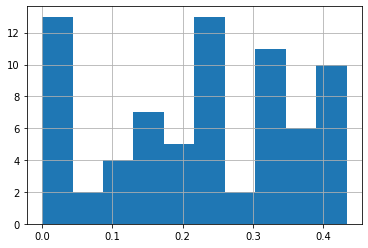

In [287]:
age_inc.ratio.hist()

## Задание 3  (1 балл)

Преобразуйте категориальные признаки в бинарные.

Разделите выборку на тренировочную и тестовую (80%/20%) с сохранением баланса классов.


In [218]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [251]:
le = LabelEncoder() # взято из тетрадки с семинара
for column in data.columns:
    if data[column].dtype == 'object' and len(data[column].unique()) == 2:
        print(column)
        data[column] = le.fit_transform(data[column])

sex
income


In [252]:
data = pd.get_dummies(data, drop_first=True)

In [254]:
target = data["income"]
X = data.drop(columns=["income"])

In [255]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

## Задание 4 (3 балла)

Используя обучающую выборку, подберите модель `sklearn.ensemble.RandomForestClassifier`. Использйте стратегию k-fold и перебор параметров (например, поэксперементируйте с числом деревьев и максимальной глубиной дерева) через gridsearchcv.

Если модели слишком долго обучаются, допускается уменьшить количество объектов в обучающей выборке до 5000-10000 с сохранением баланса классов (если качество модели станет хуже, не страшно), изменив долю тренировочной выборки в задании 3.

Выведите 3 самых важных признака, а также precision и recall на тестовой выборке.

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [257]:
rfc = RandomForestClassifier(random_state=5)
n_estimators = range(10, 40, 10)
max_depth = range(3, 10, 2)
params = {"n_estimators" : n_estimators, "max_depth": max_depth}

In [258]:
cv_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=5)

In [259]:
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [244]:
best_param = cv_rfc.best_params_

In [273]:
rfc_best = RandomForestClassifier(random_state=5, n_estimators=best_param["n_estimators"],
                                  max_depth=best_param["max_depth"])

In [260]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [268]:
y_pred = rfc_best.predict(X_test)

In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00      1568

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513



In [266]:
feature_importances = rfc_best.feature_importances_
# feature_importances
for ind in np.argsort(-feature_importances):
    print(data.columns[ind], '-', feature_importances[ind])

income - 0.5754980454563776
capital-gain - 0.09089511222949832
marital-status_ Married-civ-spouse - 0.0836757344110296
education-num - 0.038950867109192
marital-status_ Never-married - 0.034859202693751645
age - 0.030203213103607775
capital-loss - 0.017348357631361222
hours-per-week - 0.01594378778316195
relationship_ Not-in-family - 0.015513483991272987
relationship_ Own-child - 0.012214214667619521
occupation_ Exec-managerial - 0.012063536861990312
occupation_ Prof-specialty - 0.010896209116115132
education_ Bachelors - 0.010891166400799783
sex - 0.008500171463064329
education_ Masters - 0.007994875749844244
relationship_ Unmarried - 0.005178743975362833
occupation_ Other-service - 0.004124877239294323
relationship_ Wife - 0.0028604171725460747
education_ HS-grad - 0.0025615851249477122
education_ Doctorate - 0.001357026923761514
education_ 7th-8th - 0.0013236848319717934
education_ Prof-school - 0.0013190109717771694
marital-status_ Widowed - 0.0011297945209683981
workclass_ Self-em

## Задание 5 (1.5 балла)

На графике зависимость качества показанного ансамблевой моделью на тестовой и обучающей выборке от количества базовых алгоритмов входящих в нее. С максимальным количеством базовых алгоритмов модель недообучается или переобучается? В какой момент она начинает это делать? Почему вы так думаете (это про оба предыдущих вопроса) ?
![](https://www.dropbox.com/s/cy2xtdn1c99jys3/2_1.png?dl=1)

## Задание 6 (1.5 балла)
Вы обучили вот такую модель. Качество на тестовой выборке плохое. Как вы думаете почему? Какой параметр стоило бы поменять в первую очередь, чтобы это исправить? На что он влияет?
![img](https://www.dropbox.com/s/aq4hul4gfclskr9/3_1.png?dl=1)